In [6]:
import copy
import PIL.Image
from PIL.Image import Image
import random
import IPython.display
from typing import Callable

class Pair:
    def __init__(self, x, y):
        self.x = x
        self.y = y

#Settings
width = height = 200
x = int(width / 2)
y = int(height / 2)
red = (255, 0, 0)
scale = 2
iterations = 1000
moves_per_frame = 5

def run(walk : Callable[[Pair, list[Pair]], None]) -> IPython.display.Image:
    p : Pair = Pair(x, y)
    oldPoints = []
    image : Image = PIL.Image.new('RGB', (width, height), "white")
    imageSeq : list[Image] = [image.copy().resize((scale*width, scale*height))]
    for i in range(iterations):
        if 0 < p.x < width and 0 < p.y < height: 
            image.putpixel((p.x, p.y), red)
        oldPoints.append(copy.deepcopy(p))
        if i % moves_per_frame: #Only draw an image every n frames
            imageSeq.append(image.copy().resize((scale*width, scale*height)))
        walk(p, oldPoints)
    name = walk.__name__ + '.gif'
    imageSeq[0].save(name,save_all=True,append_images=imageSeq,duration=1,loop=1)
    return IPython.display.Image(open(name,'rb').read())

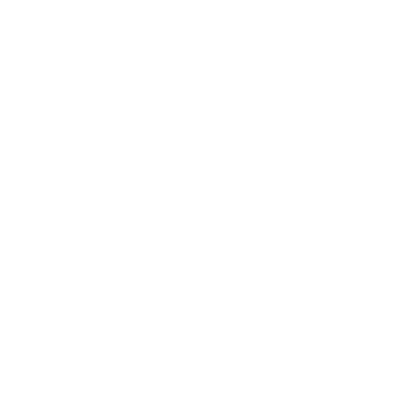

In [7]:
def randomWalk(p : Pair, _) -> None:
    rand : int = random.randint(1,4)
    if rand == 1:
        p.x += 1
    if rand == 2:
        p.y += 1
    if rand == 3:
        p.x -= 1
    if rand == 4:
        p.y -= 1

run(randomWalk)

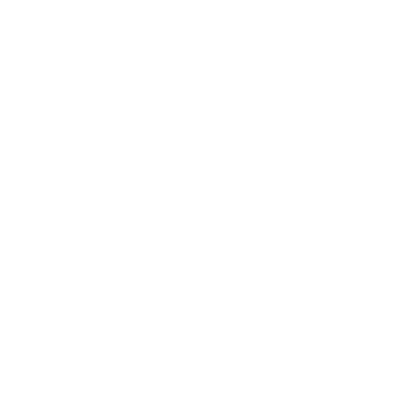

In [8]:
#Random walk that can not walk backwards

def randomWalkLeftBias(p : Pair, _) -> None:
    rand : int = random.randint(1,5)
    if rand == 1:
        p.x += 1
    if rand == 2 or rand == 3:
        p.y += 1
    if rand == 4:
        p.x -= 1
    if rand == 5:
        p.y -= 1

run(randomWalkLeftBias)

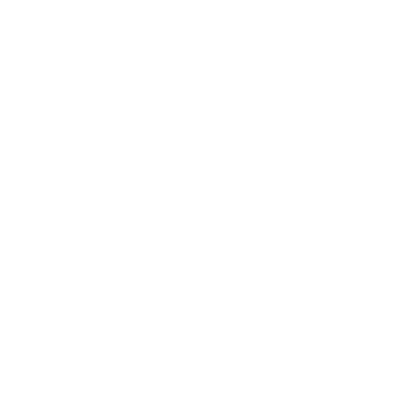

In [10]:

#Random walk than can only step in the 3 directions other than the one it came from

def randomWalkNoBackwards(p : Pair, path) -> None:
    originalPoint = copy.deepcopy(p)
    #recompute the point if we walk backwards
    while True:
        p.x = originalPoint.x
        p.y = originalPoint.y
        rand : int = random.randint(1,4)
        if rand == 1:
            p.x += 1
        elif rand == 2:
            p.y += 1
        elif rand == 3:
            p.x -= 1
        elif rand == 4:
            p.y -= 1
        if not (p.x == path[-1].x and p.y == path[-1].y):
            break

run(randomWalkNoBackwards)